major axis = [(84, 131), (153, 142), 69.87131027825369]
minor axis = [(99, 158), (107, 108), 50.635955604688654]


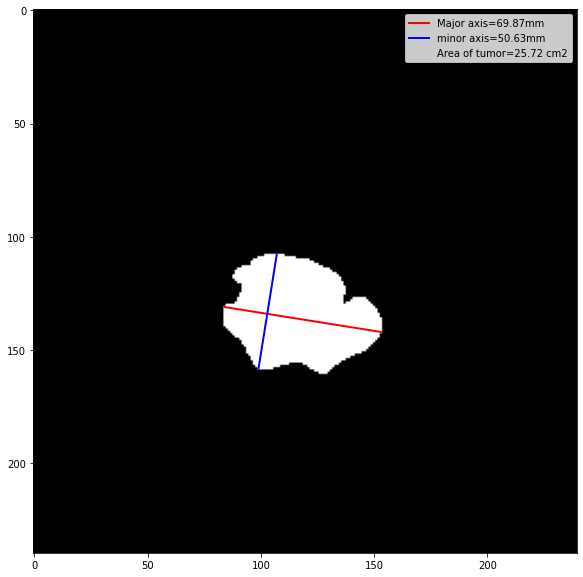

In [ ]:
import cv2
import numpy as np
import math
from math import isclose 
import matplotlib
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Input_Path = "/content/tumor.png"
# reading the biggest surface area tumor image in gray scale
Input_image = cv2.imread(Input_Path, cv2.IMREAD_GRAYSCALE)

#converting it to three channels
RGB_image = cv2.cvtColor(Input_image, cv2.COLOR_GRAY2RGB)
# binarizing the gray scale image
ret,Binary_Image=cv2.threshold(Input_image,127,255,cv2.THRESH_BINARY)
"""
Binary_Image[Binary_Image>220]=255
Binary_Image[Binary_Image==255]=250
Binary_Image[Binary_Image<250]=255
Binary_Image[Binary_Image==250]=0
"""
#getting the surface area
area_in_cm2=str(np.count_nonzero(Binary_Image==255)/100)
#converting to numpy array
Binary_Array = np.array(Binary_Image, dtype = 'uint8')
#extracting the contours using cv2 library
Contour, Hierarchy = cv2.findContours(Binary_Array, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#getting the biggest contour
contour_max = max(Contour, key=cv2.contourArea)
# saving the contour cordinates in a list
List = []
for p in contour_max:
        point_array = np.array(p[0], dtype = 'int')
        List.append(tuple(point_array))

# extracting the major axis by 
#loping on the contour points and getting the max ecludian distace between the points
Major_List = []
for p1 in range(0, len(List)):
    for p2 in range(p1+1, len(List)):
      # making sure the line is inside the tumor area 
      Line_Image = np.zeros((Input_image.shape), dtype = 'uint8')
      cv2.line(Line_Image, List[p1], List[p2], (1), thickness = 1, lineType = cv2.LINE_8)
      Stencil = cv2.bitwise_and(Line_Image, Binary_Array)

      if (Stencil == Line_Image).all():
        # ecludian distance calculation
        Distance = math.sqrt(math.pow(List[p1][0] - List[p2][0], 2) + math.pow(List[p1][1] - List[p2][1], 2))
        Major_List.append([List[p1], List[p2], Distance])

#getting the biggest line disance wise 

Major_Axis = max(Major_List, key = lambda sublist: sublist[2])
print("major axis =",Major_Axis)

# extracting the major axis by 
#loping on the contour points and getting the max ecludian distace 
#between the points that is perpendicular to the major axis
Minor_List = []
# first if condition is when the major axis is parallel to the x-axis
if (Major_Axis[1][1] - Major_Axis[0][1]) == 0:

    for p1 in range(0, len(List)):
      for p2 in range(p1+1, len(List)):

        if (List[p1][0] - List[p2][0]) == 0:
          # making sure the line is inside the tumor area 
          Minor_Line_Image = np.zeros((Input_image.shape), dtype = 'uint8')
          cv2.line(Minor_Line_Image, List[p1], List[p2], (1), thickness = 1, lineType = cv2.LINE_8)
          Minor_Stencil = cv2.bitwise_and(Minor_Line_Image, Binary_Array)
          # ecludian distance calculation

          if (Minor_Stencil == Minor_Line_Image).all():

            Minor_Distance = math.sqrt(math.pow(List[p1][0] - List[p2][0], 2) + math.pow(List[p1][1] - List[p2][1], 2))
            Minor_List.append([List[p1], List[p2], Minor_Distance])
# second if condition is when the major axis is parallel to the y-axis
elif (Major_Axis[1][0] - Major_Axis[0][0]) == 0:

    for p1 in range(0, len(List)):
      for p2 in range(p1+1, len(List)):

        if (List[p1][1] - List[p2][1]) == 0:
          # making sure the line is inside the tumor area 
          Minor_Line_Image = np.zeros((Input_image.shape), dtype = 'uint8')
          cv2.line(Minor_Line_Image, List[p1], List[p2], (1), thickness = 1, lineType = cv2.LINE_8)
          Minor_Stencil = cv2.bitwise_and(Minor_Line_Image, Binary_Array)

          if (Minor_Stencil == Minor_Line_Image).all():
          # ecludian distance calculation
            Minor_Distance = math.sqrt(math.pow(List[p1][0] - List[p2][0], 2) + math.pow(List[p1][1] - List[p2][1], 2))
            Minor_List.append([List[p1], List[p2], Minor_Distance])
# third if condition is when the major axis is neither parallel to the x-axis nor the y-axis

else:
    Minor_Axis_Slope = (-1) * (Major_Axis[1][1] - Major_Axis[0][1]) / (Major_Axis[1][0] - Major_Axis[0][0])

    for p1 in range(0, len(List)):
      for p2 in range(p1+1, len(List)):

        if (List[p1][0] - List[p2][0]) != 0 and (List[p1][1] - List[p2][1]) != 0 and isclose(((List[p1][0] - List[p2][0]) / (List[p1][1] - List[p2][1])), Minor_Axis_Slope, abs_tol = 0.01):
          # making sure the line is inside the tumor area 

          Minor_Line_Image = np.zeros((Input_image.shape), dtype = 'uint8')
          cv2.line(Minor_Line_Image, List[p1], List[p2], (1), thickness = 1, lineType = cv2.LINE_8)
          Minor_Stencil = cv2.bitwise_and(Minor_Line_Image, Binary_Array)

          if (Minor_Stencil == Minor_Line_Image).all():
          # ecludian distance calculation

            Minor_Distance = math.sqrt(math.pow(List[p1][0] - List[p2][0], 2) + math.pow(List[p1][1] - List[p2][1], 2))
            Minor_List.append([List[p1], List[p2], Minor_Distance])

#getting the biggest line disance wise 
Minor_Axis = max(Minor_List, key = lambda sublist: sublist[2])
print("minor axis =",Minor_Axis)

minor_axis_string=str(Minor_Axis[2])
major_axis_string=str(Major_Axis[2])

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(RGB_image, interpolation=None, cmap=plt.cm.Greys_r)
ax.plot((Major_Axis[0][0], Major_Axis[1][0]), (Major_Axis[0][1], Major_Axis[1][1]), lw=2, c='r', label="Major axis="+major_axis_string[:5]+"mm")
ax.plot((Minor_Axis[0][0], Minor_Axis[1][0]), (Minor_Axis[0][1], Minor_Axis[1][1]), lw=2, c='b', label="minor axis="+minor_axis_string[:5]+"mm")
ax.plot([], [], ' ', label="Area of tumor="+area_in_cm2+" cm2")
ax.legend()

fig.show()
